In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [5]:
movies= pd.read_csv('C:/Users/zan17/OneDrive/Documents/Data Sets/Movie+Assignment+Data.csv')

In [12]:
movies.describe(include='all')

,Title,title_year,budget,Gross,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country
count,100,100.000000,1.000000e+02,1.000000e+02,100,100,100,100.000000,99.000000,98.000000,...,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100,100
unique,100,NaN,NaN,NaN,75,94,96,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,6
top,La La Land,NaN,NaN,NaN,Leonardo DiCaprio,Tom Hardy,Mackenzie Foy,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PG-13,USA
freq,1,NaN,NaN,NaN,5,2,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,81
mean,NaN,2012.820000,7.838400e+07,1.468679e+08,NaN,NaN,NaN,13407.270000,7377.303030,3002.153061,...,7.723000,7.780000,7.65100,7.624000,7.770000,7.274000,7.958000,7.793000,NaN,NaN
std,NaN,1.919491,7.445295e+07,1.454004e+08,NaN,NaN,NaN,10649.037862,13471.568216,6940.301133,...,0.260479,0.282128,0.21485,0.213258,0.301344,0.361987,0.232327,0.264099,NaN,NaN
min,NaN,2010.000000,3.000000e+06,2.238380e+05,NaN,NaN,NaN,39.000000,12.000000,0.000000,...,7.200000,7.200000,7.10000,7.100000,7.000000,6.400000,7.500000,7.300000,NaN,NaN
25%,NaN,2011.000000,1.575000e+07,4.199752e+07,NaN,NaN,NaN,1000.000000,580.000000,319.750000,...,7.500000,7.600000,7.50000,7.475000,7.500000,7.100000,7.800000,7.600000,NaN,NaN
50%,NaN,2013.000000,4.225000e+07,1.070266e+08,NaN,NaN,NaN,13000.000000,1000.000000,626.500000,...,7.700000,7.800000,7.65000,7.600000,7.800000,7.300000,7.950000,7.750000,NaN,NaN
75%,NaN,2014.000000,1.500000e+08,2.107548e+08,NaN,NaN,NaN,20000.000000,11000.000000,1000.000000,...,7.900000,8.000000,7.80000,7.800000,7.925000,7.500000,8.100000,7.925000,NaN,NaN


In [33]:
#Reducing the Budget and Gross columns to be shown in millions for readability
movies['budget_in_millions'] = movies['budget'] / 1e6
movies['gross_in_millions']=movies['Gross'] /1e6
pd.set_option('display.precision', 2)

In [34]:
#Creating a profit column in millions
movies['Profit']= movies['Gross']-movies['budget']
movies['profit_in_millions']=movies['Profit']/1e6
movies.insert(4, 'profit_in_millions', movies.pop('profit_in_millions'))

In [55]:
#Creating a sorted Dataframe of profit and displaying Top10
movies_sorted = movies.sort_values(by='profit_in_millions', ascending=False)
top_10_movies = movies_sorted.head(10)
pd.set_option('display.max_columns', None)
top_10_movies

,Title,title_year,budget,Gross,profit_in_millions,Profit,actor_1_name,actor_2_name,actor_3_name,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,IMDb_rating,genre_1,genre_2,genre_3,MetaCritic,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,Votes1000,VotesUS,VotesnUS,content_rating,Country,budget_in_millions,gross_in_millions
97,Star Wars: Episode VII - The Force Awakens,2015,245000000,936662225,691.66,691662225,Doug Walker,Rob Walker,0,131,12.0,0.0,8.1,Action,Adventure,Fantasy,81.0,136,155391,161810,166378,99402,40734,18060,8751,5970,4489,15768,425971,68664,4722,3919,768,220467,183671,34366,187138,162918,21362,42942,36441,5729,712,85141,250769,8.0,8.3,8.5,8.5,8.6,8.2,8.2,8.3,8.0,7.9,8.2,7.9,7.8,8.2,7.7,8.2,7.9,PG-13,USA,245.0,936.66
11,The Avengers,2012,220000000,623279547,403.28,403279547,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,26000,21000.0,19000.0,8.1,Action,Sci-Fi,NaN,69.0,143,260257,234203,264290,162604,67579,27957,12176,7201,4996,15528,691783,151617,4953,3767,1150,432999,343012,85465,295318,247617,43303,54282,44183,9138,842,145826,423958,8.0,8.2,8.2,8.2,8.5,8.1,8.1,8.3,8.0,8.0,8.1,7.9,7.9,8.1,7.4,8.3,7.9,PG-13,USA,220.0,623.28
47,Deadpool,2016,58000000,363024263,305.02,305024263,Ryan Reynolds,Ed Skrein,Stefan Kapicic,16000,805.0,361.0,8.0,Action,Adventure,Comedy,65.0,108,147467,147966,170810,105717,41811,15510,7046,4273,3037,8538,391955,79804,4598,3601,969,232840,186139,44316,159222,135428,21521,28753,24218,4009,667,67933,241138,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.1,7.9,7.9,7.9,7.8,7.8,7.9,7.3,8.1,7.9,R,USA,58.0,363.02
32,The Hunger Games: Catching Fire,2013,130000000,424645577,294.65,294645577,Jennifer Lawrence,Josh Hutcherson,Sandra Ellis Lafferty,34000,14000.0,523.0,7.6,Action,Adventure,Mystery,76.0,146,85219,83874,150153,121748,50575,18571,7591,4094,2675,6978,307237,115421,3650,1956,1664,218884,148652,67934,140683,109976,28735,27789,21545,5771,693,68521,221430,7.4,8.1,8.0,7.7,8.5,7.8,7.6,8.2,7.3,7.2,7.9,7.3,7.2,7.9,6.7,7.7,7.4,PG-13,USA,130.0,424.65
12,Toy Story 3,2010,200000000,414984497,214.98,214984497,Tom Hanks,John Ratzenberger,Don Rickles,15000,1000.0,721.0,8.3,Animation,Adventure,Comedy,92.0,103,139773,149992,158704,88289,31291,11850,4859,2932,2119,6586,389014,98386,3202,2405,776,260519,199962,58366,169886,140253,27658,32457,26171,5806,769,105490,267692,8.3,8.3,8.2,8.3,8.0,8.4,8.5,8.4,8.2,8.2,8.3,8.1,8.1,8.1,8.1,8.5,8.3,G,USA,200.0,414.98
8,The Dark Knight Rises,2012,250000000,448130642,198.13,198130642,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,27000,23000.0,23000.0,8.4,Action,Thriller,NaN,78.0,164,380589,341965,281426,134959,50406,20106,9589,5713,4073,11988,842343,143070,4726,4023,672,509635,425041,79826,348324,299862,43434,55689,46968,7741,840,160533,501687,8.5,8.4,8.6,8.5,8.6,8.7,8.7,8.6,8.3,8.3,8.2,7.9,7.9,7.9,7.8,8.4,8.4,PG-13,USA,250.0,448.13
45,The Lego Movie,2014,60000000,257756197,197.76,197756197,Morgan Freeman,Will Ferrell,Alison Brie,11000,8000.0,2000.0,7.8,Animation,Action,Adventure,83.0,100,41269,50795,83773,55181,21793,8596,3680,2053,1466,2918,180122,37351,1887,1464,414,111043,89180,20677,77271,65191,11020,13346,11079,2032,579,42963,114308,7.8,7.7,8.2,8.2,7.9,7.9,8.0,7.7,7.6,7.6,7.5,7.4,7.4,7.4,7.2,8.0,7.6,PG,Australia,60.0,257.76
1,Zootopia,2016,150000000,341268248,191.27,191268248,Ginnifer Goodwin,Jason Bateman,Idris Elba,2800,28000.0,27000.0,8.1,Animation,Adventure,Comedy,78.0,108,53626,70912,102352,57261,16719,4539,1467,733,496,1386,176202,52345,2362,1641,706,119637,87499,30813,75474,61358,13034,12353,9959,2151,518,35975,122844,8.0,8.3,8.4,8.3,8.7,8.2,8.1,8.4,7.8,7.8,8.1,7.8,7.8,8.1,7.6,8.0,8.0

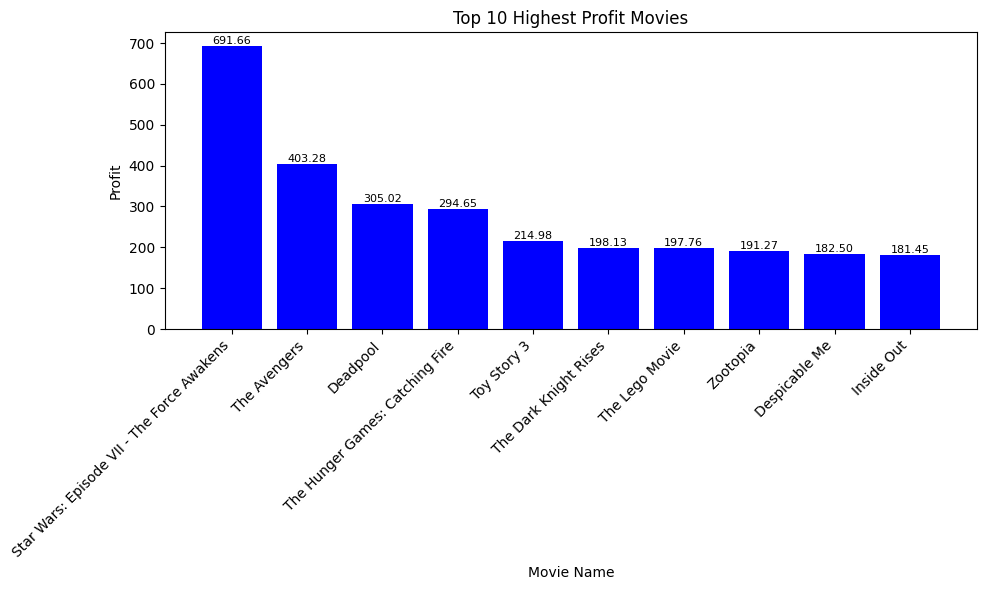

In [53]:
#Bar Graph of top 10 movies by profit 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_movies['Title'], top_10_movies['profit_in_millions'], color='blue')
plt.xlabel('Movie Name')
plt.ylabel('Profit')
plt.title('Top 10 Highest Profit Movies')
plt.xticks(rotation=45, ha='right') 

# Add actual values on top of each bar
plt.bar_label(bars, fmt='%.2f', label_type='edge', fontsize=8)

plt.tight_layout()
plt.show()


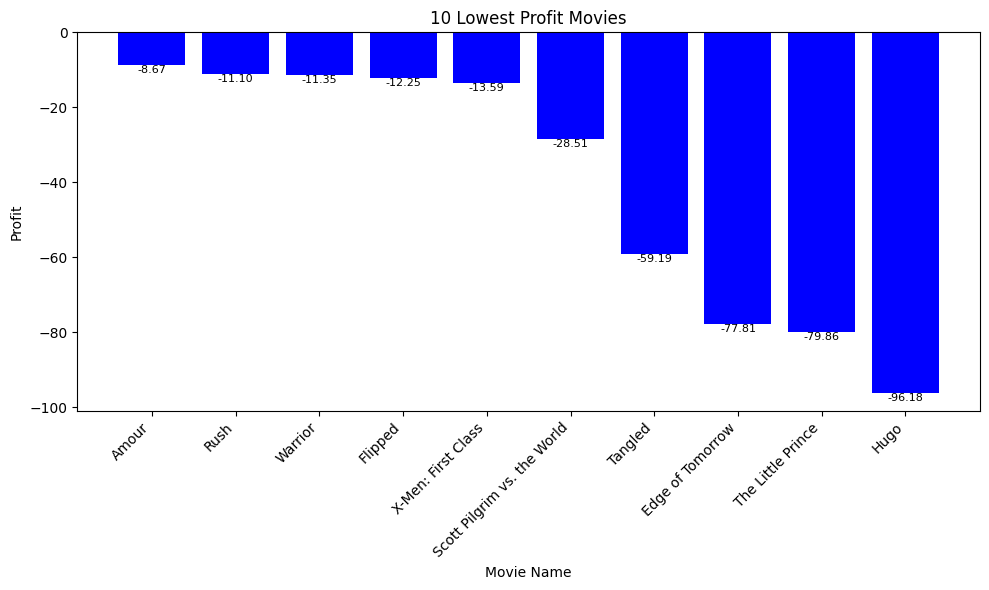

In [47]:
import matplotlib.pyplot as plt

lowest_profit = movies_sorted.tail(10)

plt.figure(figsize=(10, 6))
bars = plt.bar(lowest_profit['Title'], lowest_profit['profit_in_millions'], color='blue')
plt.xlabel('Movie Name')
plt.ylabel('Profit')
plt.title('10 Lowest Profit Movies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add actual values on top of each bar
plt.bar_label(bars, fmt='%.2f', label_type='edge', fontsize=8)

plt.tight_layout()
plt.show()

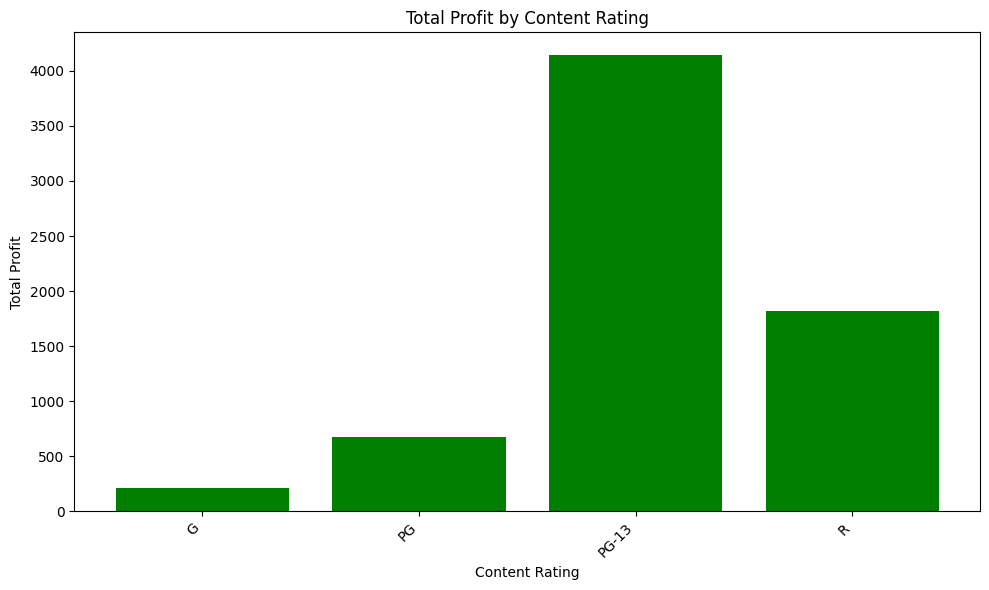

In [61]:
#showing Profit by content rating 
profit_by_rating = movies.groupby('content_rating')['profit_in_millions'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(profit_by_rating['content_rating'], profit_by_rating['profit_in_millions'], color='green')
plt.xlabel('Content Rating')
plt.ylabel('Total Profit')
plt.title('Total Profit by Content Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

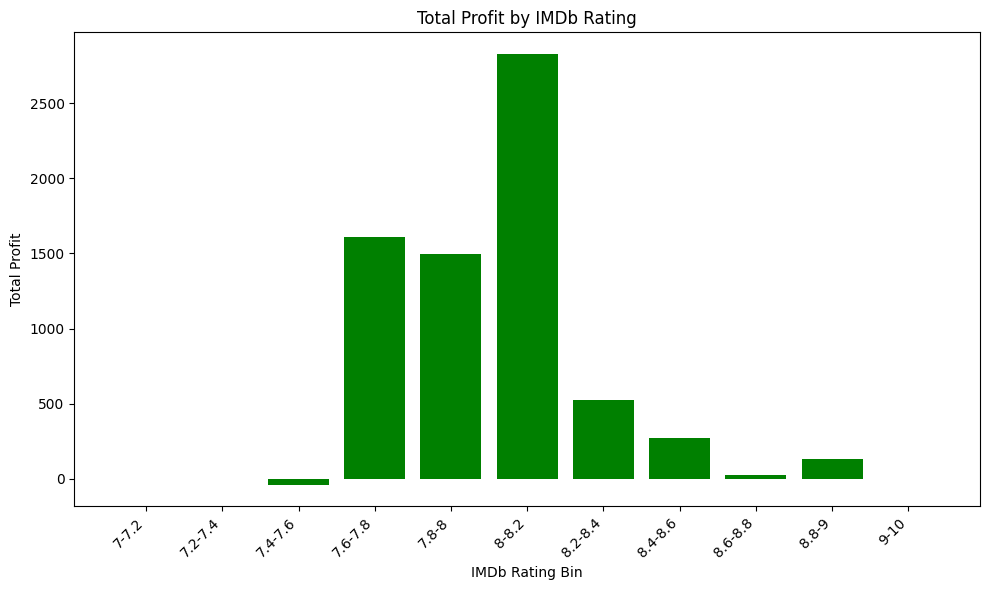

In [72]:
# Create custom bins for IMDb ratings
bins = [7, 7.2, 7.4, 7.6, 7.8, 8, 8.2, 8.4, 8.6, 8.8, 9, 10]
labels = ['7-7.2', '7.2-7.4', '7.4-7.6', '7.6-7.8', '7.8-8', '8-8.2', '8.2-8.4', '8.4-8.6', '8.6-8.8', '8.8-9', '9-10']

# Assign each movie to a bin
movies['IMDb_bin'] = pd.cut(movies['IMDb_rating'], bins=bins, labels=labels, right=False)

# Aggregate profit by IMDb bin
profit_by_score = movies.groupby('IMDb_bin')['profit_in_millions'].sum().reset_index()

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(profit_by_score['IMDb_bin'], profit_by_score['profit_in_millions'], color='green')
plt.xlabel('IMDb Rating Bin')
plt.ylabel('Total Profit')
plt.title('Total Profit by IMDb Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


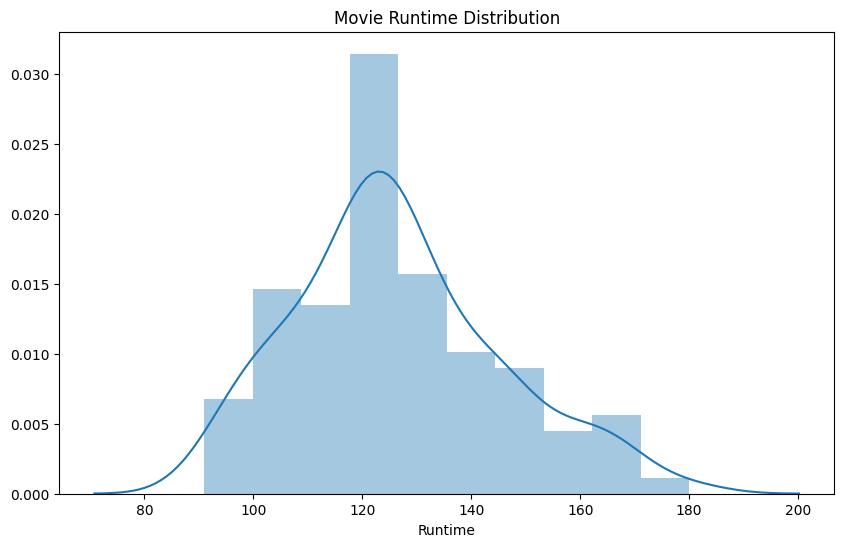

In [73]:
#Making a distribution chat of runtime 
plt.figure(figsize=(10, 6))
run=sns.distplot(movies['Runtime'])
run.axes.set_title('Movie Runtime Distribution')
run.set_xlabel("Runtime")
plt.show()

In [ ]:
#The y-values are not direct counts of observations but rather a density measure. The total area under the curve is normalized to 1.

In [83]:


# Create a new column for the total Facebook likes for each combination of actors
movies['Total_Facebook_Likes'] = movies[['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].sum(axis=1)

# Sort the DataFrame based on total Facebook likes in descending order
sorted_df = movies.sort_values(by='Total_Facebook_Likes', ascending=False)

# Select the top 5 combinations
top_5_combinations = sorted_df.head(5)[['actor_1_name', 'actor_2_name', 'actor_3_name', 'Total_Facebook_Likes']]

top_5_combinations

,actor_1_name,actor_2_name,actor_3_name,Total_Facebook_Likes
2,Dev Patel,Nicole Kidman,Rooney Mara,138800.0
27,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,79000.0
14,Jennifer Lawrence,Peter Dinklage,Hugh Jackman,76000.0
4,Casey Affleck,Michelle Williams,Kyle Chandler,74818.0
8,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,73000.0
